In [65]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy.stats as scst
%matplotlib inline

In [115]:
v_limit = 610
BoxID = 0
filename = '../data/abacus/pairs_planck_00_box_{:02d}.hdf5'.format(BoxID)
data = {}
f = h5py.File(filename, 'r')
for k in f.keys():
    data[k] = f[k][...]
f.close()
print(data.keys())

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/abacus/box_cosmo_params.dat", dtype=dtype)
hubble = cosmo_data['hubble'][BoxID]
print(hubble)

dict_keys(['mass_A', 'mass_B', 'pos_A', 'pos_B', 'pos_G', 'vel_A', 'vel_B', 'vel_G', 'vmax_A', 'vmax_B', 'vmax_G'])
69.0


In [116]:
a = data['vel_A'].copy()
b = data['vel_B'].copy()
v_cm = data['vel_A'].copy()
mass_tot = data['mass_A'] + data['mass_B']
for i in range(3):
    a[:,i] = data['vel_A'][:,i] * data['mass_A']/mass_tot
    b[:,i] = data['vel_B'][:,i] * data['mass_B']/mass_tot
    v_cm[:,i] = a[:,i] + b[:,i]
v_cm_norm = np.sqrt(np.sum(v_cm**2, axis=1))
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))

(array([3.720e+02, 2.129e+03, 4.570e+03, 6.042e+03, 6.634e+03, 6.036e+03,
        4.809e+03, 3.360e+03, 2.148e+03, 1.257e+03, 7.450e+02, 3.820e+02,
        1.770e+02, 1.080e+02, 6.300e+01, 2.400e+01, 1.100e+01, 7.000e+00,
        4.000e+00, 1.000e+00]),
 array([   8.251651,  100.29903 ,  192.3464  ,  284.3938  ,  376.44116 ,
         468.48856 ,  560.53595 ,  652.5833  ,  744.6307  ,  836.67804 ,
         928.72546 , 1020.7728  , 1112.8202  , 1204.8676  , 1296.9149  ,
        1388.9623  , 1481.0098  , 1573.0571  , 1665.1045  , 1757.1519  ,
        1849.1992  ], dtype=float32),
 <BarContainer object of 20 artists>)

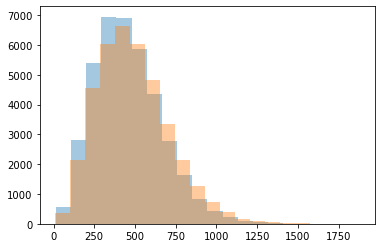

In [117]:
plt.hist(v_cm_norm, bins=20, alpha=0.4)
plt.hist(data['vel_A_mag'], bins=20, alpha=0.4)

In [118]:
data['vel_A_mag'] = np.sqrt(np.sum(data['vel_A']**2, axis=1))
data['vel_B_mag'] = np.sqrt(np.sum(data['vel_B']**2, axis=1))
data['vel_G_mag'] = np.sqrt(np.sum(data['vel_G']**2, axis=1))

data['pos_AB'] = np.sqrt(np.sum( (data['pos_B'] - data['pos_A'])**2, axis=1))
data['vel_AB'] = np.sqrt(np.sum( (data['vel_B'] - data['vel_A'])**2, axis=1))
data['vel_AB_rad'] = np.sum((data['pos_B'] - data['pos_A'])*(data['vel_B'] - data['vel_A']), axis=1)/data['pos_AB']
data['vel_AB_tan'] = np.sqrt((data['vel_AB']**2 - data['vel_AB_rad']**2))


#now we compute the radial velocity including the hubble flow
data['vel_AB_rad'] = data['vel_AB_rad'] + (data['pos_AB'] * hubble)

datos = {}
ii = (data['pos_A'][:,0] > 0) & (data['pos_A'][:,0]<720)
keys = ['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'mass_A', 'mass_B']
v_cm_norm = v_cm_norm[ii]
for kk in keys:
    print(kk)
    datos[kk] = data[kk][ii]
keys = ['vel_G_mag', 'vmax_G']
for kk in keys:
    print(kk)
    datos[kk] = data[kk][:]

vel_A_mag
vel_B_mag
pos_AB
vel_AB
vel_AB_rad
vel_AB_tan
vmax_A
vmax_B
mass_A
mass_B
vel_G_mag
vmax_G


(array([9.0050e+03, 1.6963e+04, 8.4810e+03, 3.1150e+03, 9.4000e+02,
        2.6900e+02, 7.3000e+01, 2.2000e+01, 8.0000e+00, 3.0000e+00]),
 array([0.37501404, 0.9526874 , 1.5303608 , 2.1080341 , 2.6857076 ,
        3.2633808 , 3.8410542 , 4.4187274 , 4.996401  , 5.5740743 ,
        6.1517477 ], dtype=float32),
 <BarContainer object of 10 artists>)

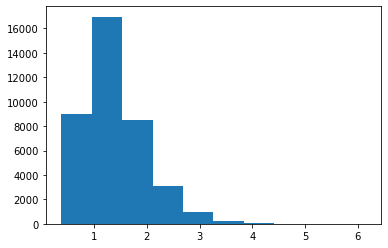

In [119]:
plt.hist(data['pos_AB'])

458.43958 477.43582


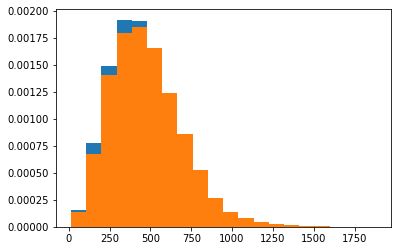

In [120]:
lim = 627
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0)
plt.hist(v_cm_norm, density=True, bins=20)
plt.hist(v_cm_norm[ii], density=True, bins=20)
print(np.mean(v_cm_norm), np.mean(v_cm_norm[ii]))

In [121]:
def compare(pec_vel, probe, name='probe', xlim=[0,100]):
    nn = len(probe)
    print(nn)
    isort = np.argsort(pec_vel)
    print(pec_vel[-nn//4])
    ii_4 = isort[-nn//4:]
    #ii_4 = pec_vel > 627
    plt.subplot(1,2,1)
    plt.plot(np.sort(probe), np.linspace(0.0, 1.0, nn))
    plt.plot(np.sort(probe[ii_4]), np.linspace(0.0, 1.0, np.count_nonzero(ii_4)))

    res = scst.ks_2samp(probe,probe[ii_4])
    print(res.statistic)
    print(res.pvalue)
    plt.title('KS statistic={:.2f} - p_value={:.2e}'.format(res.statistic, res.pvalue))
    plt.xlabel(name)
    plt.xlim(xlim)
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.hist(np.sort(probe), bins=np.linspace(xlim[0], xlim[1], 20), density=True, label='mean {:.2f}'.format(np.mean(probe)))
    plt.hist(np.sort(probe[ii_4]), density=True, bins=np.linspace(xlim[0], xlim[1], 20), alpha=0.4, 
             label='mean {:.2f}'.format(np.mean(probe[ii_4])))
    plt.legend()
    #plt.hist(np.sort(probe[ii_others]), density=True, alpha=0.4)

    print(np.median(probe), np.median(probe[ii_4]), np.count_nonzero(probe[ii_4]))

2223
845.09357
0.03410227283760037
0.6621670123598669
0.5500409 0.48998544 556


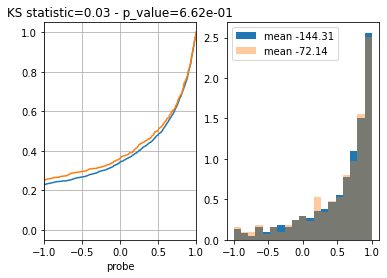

In [122]:
beta = 1.0 - 0.5*(datos['vel_AB_tan']**2/datos['vel_AB_rad']**2)
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0) & ((datos['vmax_A'] < 240) & (datos['vmax_B']<240)) 
compare(v_cm_norm[ii], beta[ii], xlim=[-1,1])

8871
282.98972
0.05460559371226026
4.8709979235339596e-05
105.02851 115.00722 2218


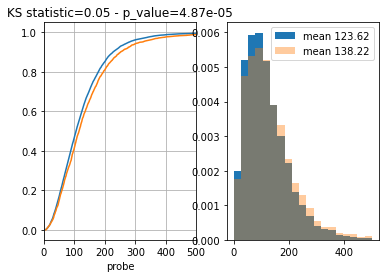

In [123]:
probe = datos['vel_AB_tan']
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0) & ((datos['vmax_A'] < 300) & (datos['vmax_B']<300))
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0) & ((datos['mass_A']*1E10 < 5E12) & (datos['vmax_B']*1E10 <5E12)) 


compare(v_cm_norm[ii], probe[ii], xlim=[0,500])

8871
282.98972
0.030499070994443045
0.07176832143473555
-121.87532 -118.416084 2218


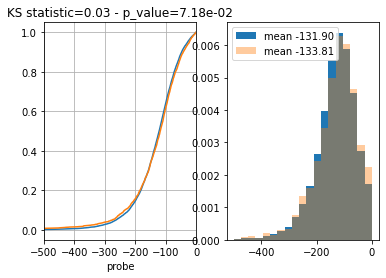

In [124]:
probe = datos['vel_AB_rad']
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0) & ((datos['mass_A']*1E10 < 5E12) & (datos['vmax_B']*1E10 <5E12)) 
compare(v_cm_norm[ii], probe[ii], xlim=[-500,0])

9621
624.99475
0.04926593193764368
0.00016796938145557938
0.65559006 0.587397 2406


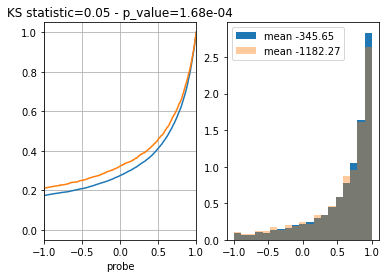

In [125]:
beta = 1.0 - 0.5*(datos['vel_AB_tan']**2/datos['vel_AB_rad']**2)
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0)
compare(v_cm_norm[ii], beta[ii], xlim=[-1,1])

2223
845.09357
0.025363514856131288
0.9287353083477609
464.0 463.5 556


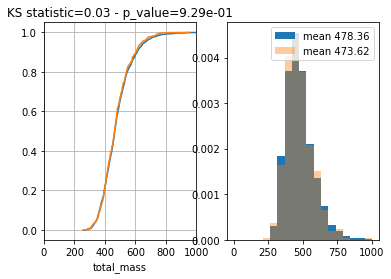

In [126]:
probe = datos['mass_A'] + datos['mass_B']
ii = (datos['vel_AB_rad']<0) & (datos['pos_AB']<1.0) & ((datos['vmax_A'] < 240) & (datos['vmax_B']<240)) 
compare(v_cm_norm[ii], probe[ii], xlim=[0,1000], name='total_mass')